# Algorithm Trading

## 1. Importing and Refining Data

Importing all the necessary libraries.
Alpha_vintage library is used to get the financial data.

In [4]:
# ! pip install --user pandas_datareader
# alpha_vantage
# ! pip install --user alpha_vantage

In [2]:
import pandas_datareader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
# from alpha_vantage.timeseries import TimeSeries
import datetime

In [3]:
# ts = TimeSeries(key = 'GKR7N17NQ0AOYH7T', output_format='pandas')

In [211]:
stock_AAPL=pdr.get_data_yahoo('AAPL', datetime.date.today()-datetime.timedelta(2000), datetime.date.today()-datetime.timedelta(180), interval='d')
stock_MSFT=pdr.get_data_yahoo('MSFT',datetime.date.today()-datetime.timedelta(2000), datetime.date.today()-datetime.timedelta(180), interval='d')
stock_F=pdr.get_data_yahoo('F', datetime.date.today()-datetime.timedelta(2000), datetime.date.today()-datetime.timedelta(180), interval='d')
stock_T=pdr.get_data_yahoo('T', datetime.date.today()-datetime.timedelta(2000), datetime.date.today()-datetime.timedelta(180), interval='d')
# stock_AAPL, metadata = ts.get_daily_adjusted('AAPL', outputsize='full')
# stock_MSFT, metadata = ts.get_daily_adjusted('MSFT', outputsize='full')
# stock_F, metadata = ts.get_daily_adjusted('F', outputsize='full')
# stock_T, metadata = ts.get_daily_adjusted('T', outputsize='full')
stock_T

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-05-02,39.150002,38.779999,38.869999,39.099998,22063300.0,28.149235
2016-05-03,39.080002,38.680000,39.020000,38.910000,21826000.0,28.012440
2016-05-04,39.000000,38.580002,38.750000,38.880001,15480800.0,27.990849
2016-05-05,38.990002,38.660000,38.939999,38.740002,16239500.0,27.890055
2016-05-06,38.990002,38.470001,38.779999,38.990002,15663700.0,28.070040
...,...,...,...,...,...,...
2021-04-20,30.020000,29.850000,29.969999,29.889999,27038700.0,28.793848
2021-04-21,30.240000,29.910000,29.959999,30.110001,34357400.0,29.005781
2021-04-22,31.889999,31.150000,31.299999,31.360001,108523100.0,30.209940


I an going to analyze the stock before the Covid 19 pandemic struck and hence I am going to remove the stock data from 8th Jan'20.

In [212]:
df_AAPL = pd.DataFrame(stock_AAPL)
df_MSFT = pd.DataFrame(stock_MSFT)
df_F = pd.DataFrame(stock_F)
df_T = pd.DataFrame(stock_T)

In [213]:
df_MSFT.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-05-02,50.750000,49.779999,50.000000,50.610001,33114500.0,46.212559
2016-05-03,50.410000,49.599998,50.340000,49.779999,26460200.0,45.454685
2016-05-04,50.060001,49.459999,49.840000,49.869999,24257600.0,45.536858
2016-05-05,50.299999,49.730000,49.869999,49.939999,25390700.0,45.600769
2016-05-06,50.389999,49.660000,49.919998,50.389999,24787300.0,46.011658


In [214]:
df_MSFT.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-20,260.200012,256.839996,257.820007,258.260010,19722900.0,257.172699
2021-04-21,260.679993,257.250000,258.940002,260.579987,24030400.0,259.482910
2021-04-22,261.779999,255.639999,260.209991,257.170013,25606200.0,256.087280
2021-04-23,261.510010,257.269989,257.880005,261.149994,21462600.0,260.050507
2021-04-26,262.440002,260.170013,261.660004,261.549988,19763300.0,260.448822


## 2. Exploratory Data Analysis

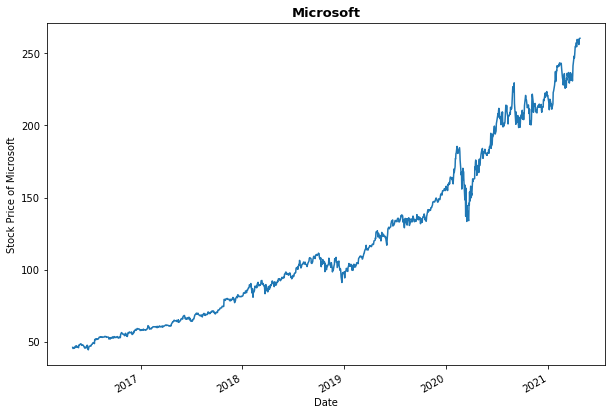

In [215]:
df_MSFT['Adj Close'].plot(figsize=(10, 7))
plt.xlabel('Date')
plt.ylabel('Stock Price of Microsoft')
plt.title('Microsoft',fontweight="bold",fontsize=13)
plt.show()

In [9]:
df_MSFT['Adj Close'].iloc[-1], df_MSFT['Adj Close'].iloc[0], df_MSFT['Adj Close'].iloc[1]

(260.050537109375, 46.21255874633789, 45.45467758178711)

Getting all the data for Adjacent Closing price in one table.

In [10]:
df_Adj_Close = pd.concat([df_MSFT['Adj Close'], df_AAPL['Adj Close'], df_F['Adj Close'],df_T['Adj Close']], axis=1)
df_Adj_Close.columns=['MSFT','AAPL','Ford','AT&T']
df_Adj_Close.head()

,MSFT,AAPL,Ford,AT&T
Date,,,,
2016-05-02,46.212559,21.704407,10.839666,28.149225
2016-05-03,45.454678,22.061357,10.688451,28.012453
2016-05-04,45.536850,21.831896,10.592948,27.990850
2016-05-05,45.600777,21.743273,10.600907,27.890057
2016-05-06,46.011673,21.622013,10.696410,28.070040


Normalizing the data and then comparing them. We are normalizing the data by dividing it by it's first trading price.  

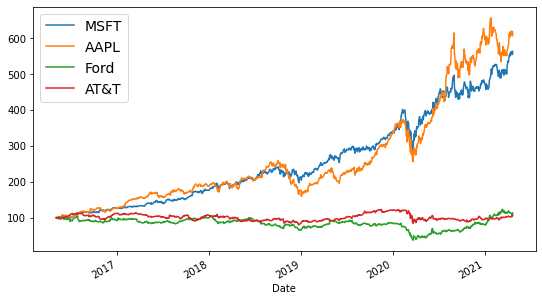

In [11]:
(df_Adj_Close / df_Adj_Close.iloc[0] *100).plot(figsize = (9 , 5));
plt.legend(loc=2, prop={'size': 14})
plt.show()

In [12]:
df_Open = pd.concat([df_MSFT['Open'], df_AAPL['Open'], df_F['Open'],df_T['Open']], axis=1)
df_Close = pd.concat([df_MSFT['Close'], df_AAPL['Close'], df_F['Close'],df_T['Close']], axis=1)
df_High = pd.concat([df_MSFT['High'], df_AAPL['High'], df_F['High'],df_T['High']], axis=1)
df_Low = pd.concat([df_MSFT['Low'], df_AAPL['Low'], df_F['Low'],df_T['Low']], axis=1)
df_Volume = pd.concat([df_MSFT['Volume'], df_AAPL['Volume'], df_F['Volume'],df_T['Volume']], axis=1)
df_Open.columns=['MSFT','AAPL','Ford','AT&T']
df_Close.columns=['MSFT','AAPL','Ford','AT&T']
df_High.columns=['MSFT','AAPL','Ford','AT&T']
df_Low.columns=['MSFT','AAPL','Ford','AT&T']
df_Volume.columns=['MSFT','AAPL','Ford','AT&T']

Now we have the trading data for all the 4 companies in data frames.

In [13]:
df_Open

,MSFT,AAPL,Ford,AT&T
Date,,,,
2016-05-02,50.000000,23.492500,13.67,38.869999
2016-05-03,50.340000,23.549999,13.50,39.020000
2016-05-04,49.840000,23.799999,13.29,38.750000
2016-05-05,49.869999,23.500000,13.35,38.939999
2016-05-06,49.919998,23.342501,13.26,38.779999
...,...,...,...,...
2021-04-19,260.190002,133.509995,12.22,30.000000
2021-04-20,257.820007,135.020004,12.06,29.969999
2021-04-21,258.940002,132.360001,11.36,29.959999


<b>Moving Average</b>: 

In [14]:
df_MSFT['Window 40']=df_MSFT['Adj Close'].rolling(window=40).mean()

In [15]:
df_MSFT['Window 252']=df_MSFT['Adj Close'].rolling(window=252).mean()

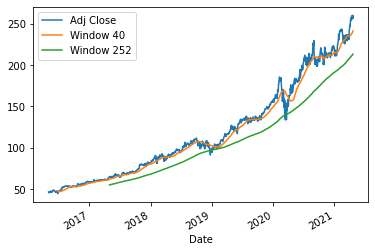

In [16]:
df_MSFT[['Adj Close', 'Window 40', 'Window 252']].plot()
plt.show()

<b>Volatility</b>: The volatility of a stock is a measurement of the change in variance in the returns of a stock over a specific period of time

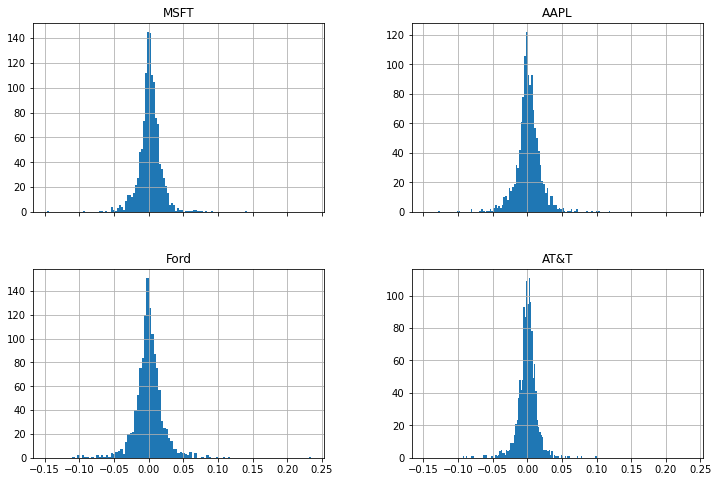

In [17]:
df_daily_pct_change = df_Adj_Close.pct_change()
df_daily_pct_change.hist(bins=100, sharex=True, figsize=(12,8))
plt.show()

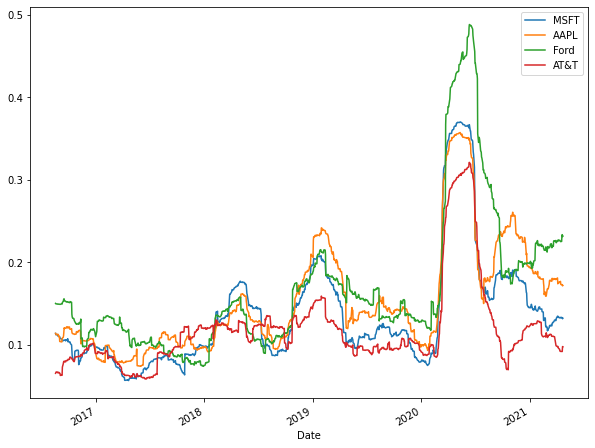

In [18]:
min_periods = 75 
vol = df_daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 
vol.plot(figsize=(10, 8))
plt.show()

## 3. Linear Modelling

Compiling the table for log(daily_returns)

In [19]:
import statsmodels.api as sm
df_log_returns=pd.DataFrame()
df_log_returns['MSFT'] = np.log(df_MSFT['Adj Close'] / df_MSFT['Adj Close'].shift(1) )
df_log_returns['AAPL'] = np.log(df_AAPL['Adj Close'] / df_AAPL['Adj Close'].shift(1) )
df_log_returns['F'] = np.log(df_F['Adj Close'] / df_F['Adj Close'].shift(1) )
df_log_returns['T'] = np.log(df_T['Adj Close'] / df_T['Adj Close'].shift(1))
df_log_returns=df_log_returns[1:]
df_log_returns

,MSFT,AAPL,F,T
Date,,,,
2016-05-03,-0.016536,0.016312,-0.014048,-0.004871
2016-05-04,0.001806,-0.010456,-0.008975,-0.000771
2016-05-05,0.001403,-0.004068,0.000751,-0.003607
2016-05-06,0.008970,-0.005592,0.008969,0.006433
2016-05-09,-0.006371,0.000755,-0.008969,-0.003340
...,...,...,...,...
2021-04-19,-0.007700,0.005056,-0.009860,0.001335
2021-04-20,-0.001857,-0.012913,-0.056042,-0.003340
2021-04-21,0.008943,0.002925,0.024160,0.007333


In [20]:
X = sm.add_constant(df_log_returns['AAPL'])
model = sm.OLS(df_log_returns['MSFT'],X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     1381.
Date:                Thu, 21 Oct 2021   Prob (F-statistic):          2.97e-204
Time:                        13:56:14   Log-Likelihood:                 3772.7
No. Observations:                1253   AIC:                            -7541.
Df Residuals:                    1251   BIC:                            -7531.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.258      0.2

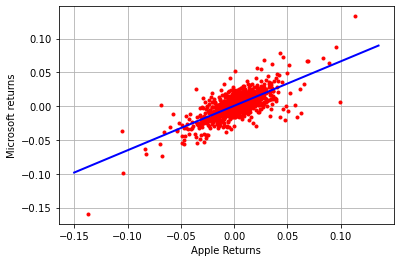

In [21]:
plt.plot(df_log_returns['AAPL'], df_log_returns['MSFT'], 'r.')
ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')
plt.show()

We can cross check our results by using rolling correlation of returns.

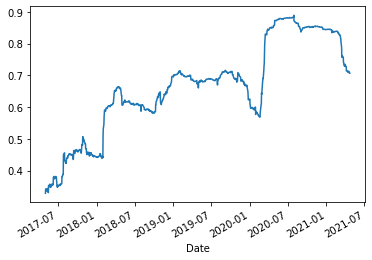

In [22]:
df_log_returns['MSFT'].rolling(window=252).corr(df_log_returns['AAPL']).plot()
plt.show()

## 4. Technical Indicators

### Volatility Indicator
###  ATR and Bollinger Bands

Average True Range(ATR) and Bollinger Bands are Volatility Indicators.<br> Bollinger Bands comprises of 2 lines plotted 'n'(usually 2) standard deviations from a 'm'(usually 20) period simple moving average. The Bands widen during increase volatility and shrink during periods of reduced volatility.
<br> ATR measure volatility from the range perspective by taking the max of the difference of High and Low, High and Previous Day Close & Low and Previous Day Close.

In [23]:
def ATR(DF,n):
    df = DF.copy()
    df['H-L'] = abs(df['High']-df['Low'])
    df['H-PC'] = abs(df['High']-df['Adj Close'].shift(1))
    df['L-PC'] = abs(df['Low']-df['Adj Close'].shift(1))
    df['TR'] = df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
    df2.dropna(inplace=True)
    return df2

In [24]:
ATR_signals = pd.DataFrame()
ATR_signals = (ATR(df_AAPL,20))
# print(ATR_signals['ATR']) 
print(ATR_signals)    

                  High         Low        Open       Close       Volume  \
Date                                                                      
2016-05-31   25.100000   24.705000   24.900000   24.965000  169228800.0   
2016-06-01   24.885000   24.582500   24.754999   24.615000  116693200.0   
2016-06-02   24.459999   24.157499   24.400000   24.430000  160766400.0   
2016-06-03   24.567499   24.362499   24.447500   24.480000  114019600.0   
2016-06-06   25.472500   24.387501   24.497499   24.657499   93170000.0   
...                ...         ...         ...         ...          ...   
2021-04-19  135.470001  133.339996  133.509995  134.839996   94264200.0   
2021-04-20  135.529999  131.809998  135.020004  133.110001   94812300.0   
2021-04-21  133.750000  131.300003  132.360001  133.500000   68847100.0   
2021-04-22  134.149994  131.410004  133.039993  131.940002   84566500.0   
2021-04-23  135.119995  132.160004  132.160004  134.320007   78657500.0   

             Adj Close  

<AxesSubplot:title={'center':'ATR'}, xlabel='Date'>

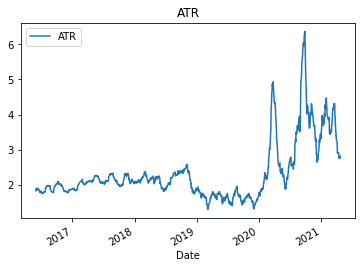

In [25]:
ATR_signals.iloc[:,[-1]].plot(title="ATR")

In [26]:
def BollBnd(DF,n):
    df = DF.copy()
    df["MA"] = df['Adj Close'].rolling(n).mean()
    df["BB_up"] = df["MA"] + 2*df['Adj Close'].rolling(n).std(ddof=0)
    df["BB_dn"] = df["MA"] - 2*df['Adj Close'].rolling(n).std(ddof=0) 
    df["BB_width"] = df["BB_up"] - df["BB_dn"]
    df.dropna(inplace=True)
    return df
#ddof=0 is required since we want to take the standard deviation of the population and not sample

In [27]:
BollBnd_signals = pd.DataFrame()
BollBnd_signals=(BollBnd(df_AAPL,20))
print(BollBnd_signals['MA'])

Date
2016-05-27     22.070885
2016-05-31     22.150016
2016-06-01     22.194976
2016-06-02     22.242781
2016-06-03     22.297349
                 ...    
2021-04-19    126.536661
2021-04-20    127.021112
2021-04-21    127.567363
2021-04-22    128.157974
2021-04-23    128.842285
Name: MA, Length: 1235, dtype: float64


<AxesSubplot:title={'center':'Bollinger Band'}, xlabel='Date'>

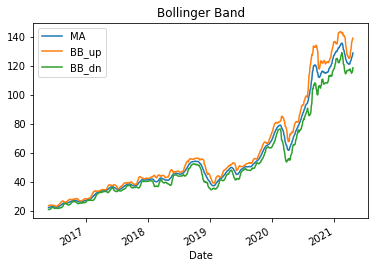

In [28]:
BollBnd_signals.iloc[:,[-4,-3,-2]].plot(title="Bollinger Band")

<AxesSubplot:title={'center':'Bollinger Band'}, xlabel='Date'>

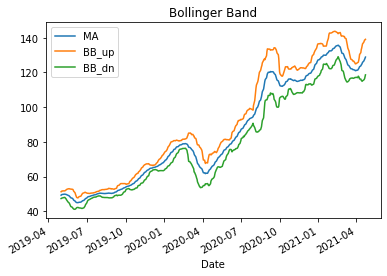

In [29]:
BollBnd_signals.iloc[-500:,[-4,-3,-2]].plot(title="Bollinger Band")

### Trend Indicators
### A. MACD

Moving Average Convergence Divergence is a momentum indicator calculated by taking the difference of 2 moving averages of an asset price(Usually 12 period MA & 26 period MA). A signal line is also calculated by taking a moving average of the of the MACD line constructed above. <br>
The MACD line cutting the signal line from below indicates a bullish trend and the former cutting the latter from above indicates a bearish trend. This is called the crossover strategy. 

In [30]:
def MACD(DF,fast_window,slow_window,signal_window):
    df = DF.copy()
    df["MA_Fast"]=df["Adj Close"].ewm(span=fast_window,min_periods=fast_window).mean()
    df["MA_Slow"]=df["Adj Close"].ewm(span=slow_window,min_periods=slow_window).mean()
    df["MACD"]=df["MA_Fast"]-df["MA_Slow"]
    df["Signal"]=df["MACD"].ewm(span=signal_window,min_periods=signal_window).mean()
    df.dropna(inplace=True)
    return df

In [31]:
MACD_signals = pd.DataFrame()
MACD_signals=(MACD(df_AAPL,12,26,9))
print(MACD_signals)    

                  High         Low        Open       Close       Volume  \
Date                                                                      
2016-06-17   24.162500   23.825001   24.155001   23.832500  244032800.0   
2016-06-20   24.142500   23.757500   24.000000   23.775000  137647600.0   
2016-06-21   24.087500   23.670000   23.735001   23.977501  142185600.0   
2016-06-22   24.222500   23.837500   24.062500   23.887501  116876400.0   
2016-06-23   24.072500   23.812500   23.985001   24.025000  128960800.0   
...                ...         ...         ...         ...          ...   
2021-04-19  135.470001  133.339996  133.509995  134.839996   94264200.0   
2021-04-20  135.529999  131.809998  135.020004  133.110001   94812300.0   
2021-04-21  133.750000  131.300003  132.360001  133.500000   68847100.0   
2021-04-22  134.149994  131.410004  133.039993  131.940002   84566500.0   
2021-04-23  135.119995  132.160004  132.160004  134.320007   78657500.0   

             Adj Close  

<Figure size 432x288 with 0 Axes>

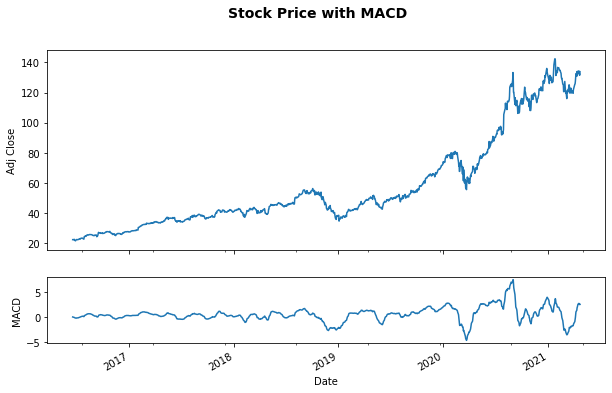

In [32]:
fig = plt.figure()
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(10, 6), gridspec_kw = {'height_ratios':[3,1]})
MACD_signals['Adj Close'].plot(ax=ax0)
ax0.set(ylabel='Adj Close')
MACD_signals['MACD'].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='MACD')
fig.suptitle('Stock Price with MACD', fontsize=14, fontweight='bold')
plt.show()

### B. ADX

Average Directional Index(ADI) is a way of measuring the strenght of the trend. It is non-direcitonal; i.e, it does not tell the direction of the trend.
<br>0-25: Weak
<br>25-50: Good
<br>50-75: Strong Trend

In [33]:
def ADX(DF,n):
    df2 = DF.copy()
    df2 = ATR(df2,n)
    df2['DMplus']=np.where((df2['High']-df2['High'].shift(1))>(df2['Low'].shift(1)-df2['Low']),df2['High']-df2['High'].shift(1),0)
    df2['DMplus']=np.where(df2['DMplus']<0,0,df2['DMplus'])
    df2['DMminus']=np.where((df2['Low'].shift(1)-df2['Low'])>(df2['High']-df2['High'].shift(1)),df2['Low'].shift(1)-df2['Low'],0)
    df2['DMminus']=np.where(df2['DMminus']<0,0,df2['DMminus'])
    TRn = []
    DMplusN = []
    DMminusN = []
    TR = df2['TR'].tolist()
    DMplus = df2['DMplus'].tolist()
    DMminus = df2['DMminus'].tolist()
    for i in range(len(df2)):
        if i < n:
            TRn.append(np.NaN)
            DMplusN.append(np.NaN)
            DMminusN.append(np.NaN)
        elif i == n:
            TRn.append(df2['TR'].rolling(n).sum().tolist()[n])
            DMplusN.append(df2['DMplus'].rolling(n).sum().tolist()[n])
            DMminusN.append(df2['DMminus'].rolling(n).sum().tolist()[n])
        elif i > n:
            TRn.append(TRn[i-1] - (TRn[i-1]/n) + TR[i])
            DMplusN.append(DMplusN[i-1] - (DMplusN[i-1]/n) + DMplus[i])
            DMminusN.append(DMminusN[i-1] - (DMminusN[i-1]/n) + DMminus[i])
    df2['TRn'] = np.array(TRn)
    df2['DMplusN'] = np.array(DMplusN)
    df2['DMminusN'] = np.array(DMminusN)
    df2['DIplusN']=100*(df2['DMplusN']/df2['TRn'])
    df2['DIminusN']=100*(df2['DMminusN']/df2['TRn'])
    df2['DIdiff']=abs(df2['DIplusN']-df2['DIminusN'])
    df2['DIsum']=df2['DIplusN']+df2['DIminusN']
    df2['DX']=100*(df2['DIdiff']/df2['DIsum'])
    ADX = []
    DX = df2['DX'].tolist()
    for j in range(len(df2)):
        if j < 2*n-1:
            ADX.append(np.NaN)
        elif j == 2*n-1:
            ADX.append(df2['DX'][j-n+1:j+1].mean())
        elif j > 2*n-1:
            ADX.append(((n-1)*ADX[j-1] + DX[j])/n)
    df2['ADX']=np.array(ADX)
    df2 = df2.drop(['DMplus','DMminus','TRn','DMplusN','DMminusN','DIminusN','DIplusN','DIdiff','DIsum'],axis=1)
    df2.dropna(inplace=True)
    return df2

In [34]:
ADX_signals = pd.DataFrame()
ADX_signals=ADX(df_AAPL,14)
print(ADX_signals)

                  High         Low        Open       Close       Volume  \
Date                                                                      
2016-06-29   23.637501   23.407499   23.492500   23.600000  146124000.0   
2016-06-30   23.942499   23.575001   23.610001   23.900000  143345600.0   
2016-07-01   24.117500   23.832500   23.872499   23.972500  104106000.0   
2016-07-05   23.850000   23.615000   23.847500   23.747499  110820800.0   
2016-07-06   23.915001   23.592501   23.650000   23.882500  123796400.0   
...                ...         ...         ...         ...          ...   
2021-04-19  135.470001  133.339996  133.509995  134.839996   94264200.0   
2021-04-20  135.529999  131.809998  135.020004  133.110001   94812300.0   
2021-04-21  133.750000  131.300003  132.360001  133.500000   68847100.0   
2021-04-22  134.149994  131.410004  133.039993  131.940002   84566500.0   
2021-04-23  135.119995  132.160004  132.160004  134.320007   78657500.0   

             Adj Close  

<Figure size 432x288 with 0 Axes>

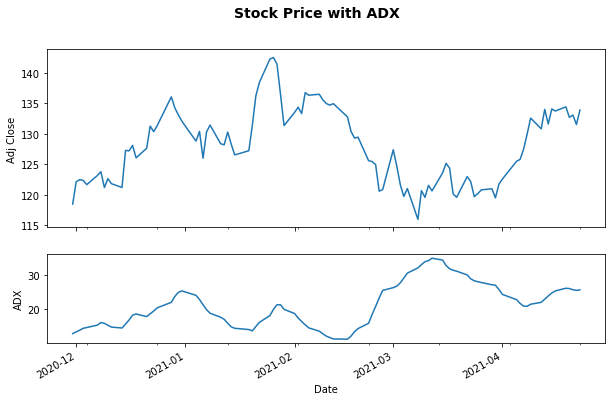

In [35]:
fig = plt.figure()
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(10, 6), gridspec_kw = {'height_ratios':[2,1]})
ADX_signals.iloc[-100:,-5].plot(ax=ax0)
ax0.set(ylabel='Adj Close')
ADX_signals.iloc[-100:,-1].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='ADX')
fig.suptitle('Stock Price with ADX', fontsize=14, fontweight='bold')
plt.show()

### C. Slope

Slope is a momentum indicator without boundaries which measures the rise-over-run of a linear regression, which is the line of best fit for a price series. <br> It can fluctuate above and below zero. It can measure the direction and strength of a trend.

In [36]:
import statsmodels.api as sm
def slope(ser,n):
    slopes = [i*0 for i in range(n-1)]
    for i in range(n,len(ser)+1):
        y = ser[i-n:i]
        x = np.array(range(n))
        y_scaled = (y - y.min())/(y.max() - y.min())
        x_scaled = (x - x.min())/(x.max() - x.min()) 
        x_scaled = sm.add_constant(x_scaled)
        model = sm.OLS(y_scaled,x_scaled)
        results = model.fit()
        slopes.append(results.params[-1])
    slope_angle = (np.rad2deg(np.arctan(np.array(slopes))))
    return np.array(slope_angle)

In [37]:
slope_signal=df_AAPL.copy()
slope_signal['slope']=slope(df_AAPL['Adj Close'],5)
print(slope_signal['slope'],slope_signal['slope'].max(),slope_signal['slope'].min())

Date
2016-05-02     0.000000
2016-05-03     0.000000
2016-05-04     0.000000
2016-05-05     0.000000
2016-05-06   -23.731712
                ...    
2021-04-19    22.779174
2021-04-20    19.589368
2021-04-21   -35.191972
2021-04-22   -38.563416
2021-04-23   -16.952729
Name: slope, Length: 1254, dtype: float64 50.02526171158259 -49.55003637189187


<Figure size 432x288 with 0 Axes>

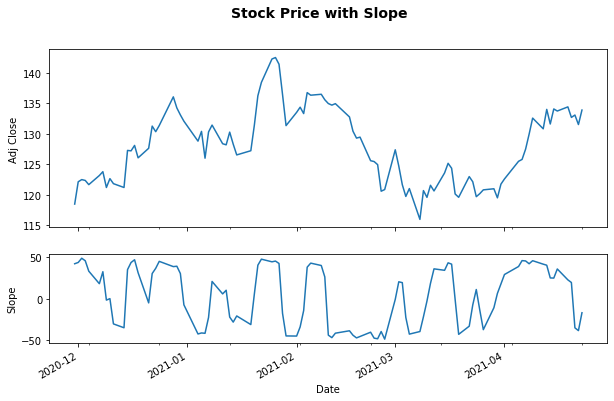

In [38]:
fig = plt.figure()
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(10, 6), gridspec_kw = {'height_ratios':[2,1]})
slope_signal.iloc[-100:,-2].plot(ax=ax0)
ax0.set(ylabel='Adj Close')
slope_signal.iloc[-100:,-1].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='Slope')
fig.suptitle('Stock Price with Slope', fontsize=14, fontweight='bold')
plt.show()

### Momentum Indicators
### A. RSI

Relative Strength Index is a momentum Oscillator which measures the speed and change of price movements. It's value oscillates between 0 and 100. <br>Above 70 means that the stock is overbought and hence price might decrease. <br> Below 30 means that the stock is oversold and hence price might increase. <br> Usually 70-30 is more developed economies, where as it is 80-20 for the developing economies like India. 

In [39]:
def RSI(DF,n):
    df = DF.copy()
    df['delta']=df['Adj Close'] - df['Adj Close'].shift(1)
    df['gain']=np.where(df['delta']>=0,df['delta'],0)
    df['loss']=np.where(df['delta']<0,abs(df['delta']),0)
    avg_gain = []
    avg_loss = []
    gain = df['gain'].tolist() 
    loss = df['loss'].tolist()
    for i in range(len(df)):
        if i < n:
            avg_gain.append(np.NaN)
            avg_loss.append(np.NaN)
        elif i == n:
            avg_gain.append(df['gain'].rolling(n).mean().tolist()[n])
            avg_loss.append(df['loss'].rolling(n).mean().tolist()[n])
        elif i > n:
            avg_gain.append(((n-1)*avg_gain[i-1] + gain[i])/n)
            avg_loss.append(((n-1)*avg_loss[i-1] + loss[i])/n)
    df['avg_gain']=np.array(avg_gain)
    df['avg_loss']=np.array(avg_loss)
    df['RS'] = df['avg_gain']/df['avg_loss']
    df['RSI'] = 100 - (100/(1+df['RS']))
    df = df.drop(['delta','gain','loss','avg_gain','avg_loss','RS'],axis=1)
    df.dropna(inplace=True)
    return df

In [40]:
RSI_signals = pd.DataFrame()
RSI_signals=(RSI(df_AAPL,14))
print(RSI_signals['RSI'])

Date
2016-05-20    57.906771
2016-05-23    61.593518
2016-05-24    65.542075
2016-05-25    69.494054
2016-05-26    71.131734
                ...    
2021-04-19    64.442449
2021-04-20    59.998459
2021-04-21    60.657098
2021-04-22    56.639591
2021-04-23    60.895063
Name: RSI, Length: 1240, dtype: float64


<Figure size 432x288 with 0 Axes>

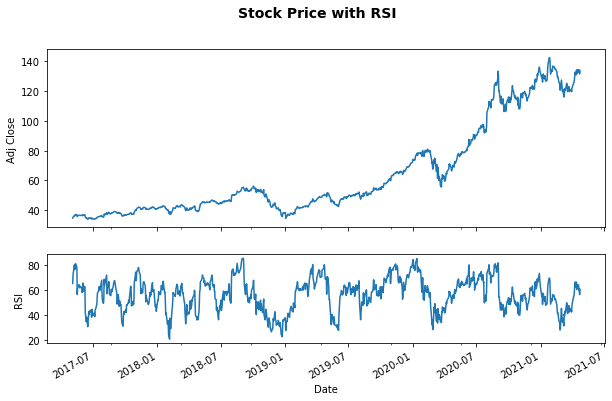

In [41]:
fig = plt.figure()
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(10, 6), gridspec_kw = {'height_ratios':[2,1]})
RSI_signals.iloc[-1000:,-2].plot(ax=ax0)
ax0.set(ylabel='Adj Close')
RSI_signals.iloc[-1000:,-1].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='RSI')
fig.suptitle('Stock Price with RSI', fontsize=14, fontweight='bold')
plt.show()

### B. Money Flow Index

The Money Flow Index (MFI) is a momentum indicator that measures the flow of money into and out of a security over a specified period of time. It is similar to RSI but unlike RSI, it incorporates volume in the calculation.It oscillates between 0 and 100.
<br>Above 80 means that the stock is overbought and hence price might decrease. <br> Below 20 means that the stock is oversold and hence price might increase. 

$$
Typical Price = \frac{ High + Low + Close }{3} 
$$

$$
Raw Money Flow = Typical Price * Volume
$$

$$
Money Flow Ratio = \frac{ nPeriod Positive Money Flow}{nPeriod Negative Money Flow} 
$$

$$
Money Flow Index = 100 - 100/(1 + Money Flow Ratio)`
$$

In [42]:
def MFI(DF,n):
    df=DF.copy()
    df['Typical_Price']=(df['High'] + df['Low'] + df['Close'])/3
    df['Money_Flow']=df['Typical_Price']*df['Volume']
    Positive_Money_Flow=[]
    Negative_Money_Flow=[]
    Typical_Price=df['Typical_Price'].tolist()
    Money_Flow=df['Money_Flow'].tolist()
    for i in range(len(df)):
        if Typical_Price[i] > Typical_Price[i-1] :
            Positive_Money_Flow.append(Money_Flow[i])
            Negative_Money_Flow.append(0)
        elif Typical_Price[i] < Typical_Price[i-1] :
            Negative_Money_Flow.append(Money_Flow[i])
            Positive_Money_Flow.append(0)
    df['Positive_Money_Flow']=np.array(Positive_Money_Flow)
    df['Negative_Money_Flow']=np.array(Negative_Money_Flow)
    nPositive_Money_Flow=[]
    nNegative_Money_Flow=[]
    for i in range(len(df)):
        if i < n:
            nPositive_Money_Flow.append(0)
            nNegative_Money_Flow.append(0)
        elif i==n:
            nPositive_Money_Flow.append(df['Positive_Money_Flow'].rolling(n).sum().tolist()[n])
            nNegative_Money_Flow.append(df['Negative_Money_Flow'].rolling(n).sum().tolist()[n])
        elif i>n:
            nPositive_Money_Flow.append(nPositive_Money_Flow[i-1] - (nPositive_Money_Flow[i-1])/n + Positive_Money_Flow[i] )
            nNegative_Money_Flow.append(nNegative_Money_Flow[i-1] - (nNegative_Money_Flow[i-1])/n + Negative_Money_Flow[i] )
    df['nPositive_Money_Flow']=np.array(nPositive_Money_Flow)
    df['nNegative_Money_Flow']=np.array(nNegative_Money_Flow)
    df['Money_Flow_Ratio']=df['nPositive_Money_Flow']/df['nNegative_Money_Flow']
    df['MFI']=100 -100/(1+df['Money_Flow_Ratio'])
    df=df.drop(['Money_Flow','Money_Flow_Ratio','nNegative_Money_Flow','nPositive_Money_Flow','Positive_Money_Flow','Negative_Money_Flow','Typical_Price'],axis=1)
    return df

In [43]:
MFI_signals = pd.DataFrame()
MFI_signals=(MFI(df_AAPL,14))
print(MFI_signals)

                  High         Low        Open       Close       Volume  \
Date                                                                      
2016-05-02   23.520000   23.100000   23.492500   23.410000  192640400.0   
2016-05-03   23.934999   23.420000   23.549999   23.795000  227325200.0   
2016-05-04   23.975000   23.455000   23.799999   23.547501  164102000.0   
2016-05-05   23.517500   23.170000   23.500000   23.309999  143562000.0   
2016-05-06   23.362499   22.962500   23.342501   23.180000  174799600.0   
...                ...         ...         ...         ...          ...   
2021-04-19  135.470001  133.339996  133.509995  134.839996   94264200.0   
2021-04-20  135.529999  131.809998  135.020004  133.110001   94812300.0   
2021-04-21  133.750000  131.300003  132.360001  133.500000   68847100.0   
2021-04-22  134.149994  131.410004  133.039993  131.940002   84566500.0   
2021-04-23  135.119995  132.160004  132.160004  134.320007   78657500.0   

             Adj Close  

<Figure size 432x288 with 0 Axes>

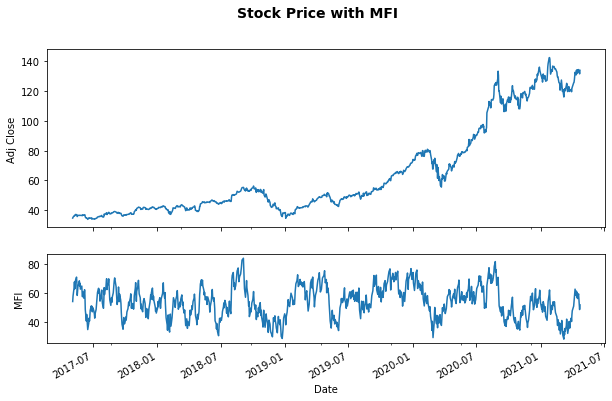

In [44]:
fig = plt.figure()
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(10, 6), gridspec_kw = {'height_ratios':[2,1]})
MFI_signals.iloc[-1000:,-2].plot(ax=ax0)
ax0.set(ylabel='Adj Close')
MFI_signals.iloc[-1000:,-1].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='MFI')
fig.suptitle('Stock Price with MFI', fontsize=14, fontweight='bold')
plt.show()

###  C. Stochastic Oscillator

The Stochastic Oscillator is a momentum indicator that shows the location of the close relative to the high-low range over a set number of periods. It oscillates between 0 and 100.<br>
Above 80 means it is in the overbought range.<br>
Below 20 means it is in the oversold range.

%K is referred to as the slow stochastic indicator. The fast stochastic indicator is taken as %D = 3-period moving average of %K.

A sell signal occurs when a decreasing %K line crosses below the %D line in the overbought region.

$$
\%K = \frac{ Current Close - Lowest Low }{Highest High - Lowest Low} * 100 
$$

$$
\%D = 3\_Day\_Moving\_Average\_\%K
$$

In [45]:
def SO(DF,k,d):
    df=DF.copy()
    high=[]
    low=[]
    close=df['Adj Close'].tolist()
    for i in range(0,len(df),k):
        var_low=10000000
        var_high=0
        for j in range(i,i+k):
            if((i+k)>len(df)):
                break
            if(close[j] < var_low):
                var_low=close[j]
            elif(var_high < close[j]):
                var_high=close[j]
        high.append(var_high)
        low.append(var_low)
    close=df['Adj Close'].tolist()
    Percent_K=[]
    for i in range(0,len(df),1):
        Percent_K.append((close[i]-low[int(i/k)])/(high[int(i/k)]-low[int(i/k)]))
    df['Percent_K']=np.array(Percent_K)
    df['Percent_S']=df['Percent_K'].rolling(d).mean()
    df.dropna(inplace=True)
    return df

In [46]:
SO_signals = pd.DataFrame()
SO_signals=(SO(df_AAPL,14,3))
print(SO_signals['Percent_K'])
# print(SO_signals['Percent_S'])
# print(SO_signals.head())

Date
2016-05-04    0.769236
2016-05-05    0.680110
2016-05-06    0.558163
2016-05-09    0.574578
2016-05-10    0.722326
                ...   
2021-04-19    0.999987
2021-04-20    0.999987
2021-04-21    0.999987
2021-04-22    0.999987
2021-04-23    0.999987
Name: Percent_K, Length: 1252, dtype: float64


<Figure size 432x288 with 0 Axes>

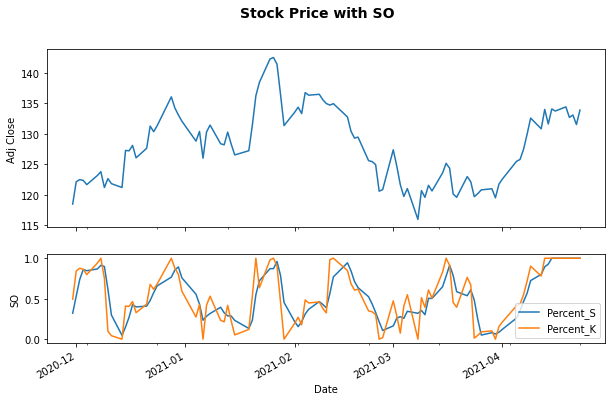

In [47]:
fig = plt.figure()
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(10, 6), gridspec_kw = {'height_ratios':[2,1]})
SO_signals.iloc[-100:,-3].plot(ax=ax0)
ax0.set(ylabel='Adj Close')
SO_signals.iloc[-100:,[-1,-2]].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='SO')
fig.suptitle('Stock Price with SO', fontsize=14, fontweight='bold')
plt.show()

### Volatility Indicator
###  ATR and Bollinger Bands

Average True Range(ATR) and Bollinger Bands are Volatility Indicators.<br> Bollinger Bands comprises of 2 lines plotted 'n'(usually 2) standard deviations from a 'm'(usually 20) period simple moving average. The Bands widen during increase volatility and shrink during periods of reduced volatility.
<br> ATR measure volatility from the range perspective by taking the max of the difference of High and Low, High and Previous Day Close & Low and Previous Day Close.

In [48]:
def ATR(DF,n):
    df = DF.copy()
    df['H-L'] = abs(df['High']-df['Low'])
    df['H-PC'] = abs(df['High']-df['Adj Close'].shift(1))
    df['L-PC'] = abs(df['Low']-df['Adj Close'].shift(1))
    df['TR'] = df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
    df2.dropna(inplace=True)
    return df2

In [49]:
ATR_signals = pd.DataFrame()
ATR_signals = (ATR(df_AAPL,20))
print(ATR_signals['ATR'])    

Date
2016-05-31    1.872990
2016-06-01    1.841359
2016-06-02    1.820649
2016-06-03    1.825344
2016-06-06    1.876276
                ...   
2021-04-19    2.778438
2021-04-20    2.751304
2021-04-21    2.768804
2021-04-22    2.764304
2021-04-23    2.811342
Name: ATR, Length: 1234, dtype: float64


<AxesSubplot:title={'center':'ATR'}, xlabel='Date'>

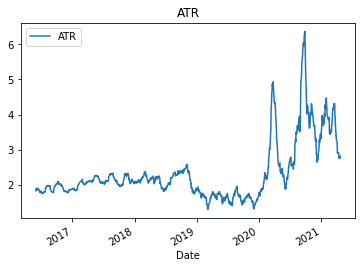

In [50]:
ATR_signals.iloc[:,[-1]].plot(title="ATR")

In [51]:
def BollBnd(DF,n):
    df = DF.copy()
    df["MA"] = df['Adj Close'].rolling(n).mean()
    df["BB_up"] = df["MA"] + 2*df['Adj Close'].rolling(n).std(ddof=0)
    df["BB_dn"] = df["MA"] - 2*df['Adj Close'].rolling(n).std(ddof=0) 
    df["BB_width"] = df["BB_up"] - df["BB_dn"]
    df.dropna(inplace=True)
    return df
#ddof=0 is required since we want to take the standard deviation of the population and not sample

In [52]:
BollBnd_signals = pd.DataFrame()
BollBnd_signals=(BollBnd(df_AAPL,20))
print(BollBnd_signals['MA'])

Date
2016-05-27     22.070885
2016-05-31     22.150016
2016-06-01     22.194976
2016-06-02     22.242781
2016-06-03     22.297349
                 ...    
2021-04-19    126.536661
2021-04-20    127.021112
2021-04-21    127.567363
2021-04-22    128.157974
2021-04-23    128.842285
Name: MA, Length: 1235, dtype: float64


<AxesSubplot:title={'center':'Bollinger Band'}, xlabel='Date'>

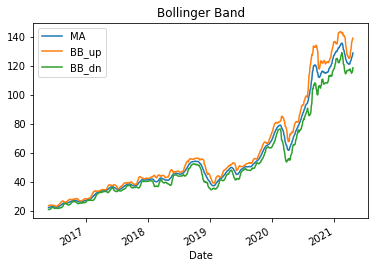

In [53]:
BollBnd_signals.iloc[:,[-4,-3,-2]].plot(title="Bollinger Band")

<AxesSubplot:title={'center':'Bollinger Band'}, xlabel='Date'>

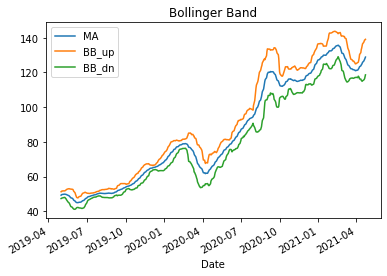

In [54]:
BollBnd_signals.iloc[-500:,[-4,-3,-2]].plot(title="Bollinger Band")

### Volume Indicators
### A. OBV

On Balance Volume(OBV) is a momentum indicator which uses changes in trading volume as an indicator of future asset price moves. It is based on the theory that volume precedes price movement.<br> Rising OBV reflects positive volume pressure that can lead to higher prices and falling OBV predicts decline in prices.


In [55]:
def OBV(DF):
    df = DF.copy()
    df['daily_return'] = df['Adj Close'].pct_change()
    df['direction'] = np.where(df['daily_return']>=0,1,-1)
    df['direction'][0] = 0
    df['vol_adj'] = df['Volume'] * df['direction']
    df['obv'] = df['vol_adj'].cumsum()
    df.dropna(inplace=True)
    return df

In [56]:
OBV_signals = pd.DataFrame()
OBV_signals=OBV(df_AAPL)
print(OBV_signals['obv'].max())

8102423900.0


<ipython-input-55-0b55241e88a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['direction'][0] = 0


### B. Chaikin Money Flow (CMF)

It is used to measure money flow volume over a set of period of time. It is used to measure the buying and selling pressure of a security for a single period.It fluctuates between -1 and 1. Typically, this oscillator fluctuates between -0.50 and +0.50 with 0 as the centerline.The usual period is 20-21 days. <br>
During a <b>Bullish Trend</b>, continuous Buying Pressure (Chaikin Money Flow values above 0) can indicate that prices will continue to rise.<br>
During a <b>Bearish Trend</b>, continuous Selling Pressure (Chaikin Money Flow values below 0) can indicate that prices will continue to fall.<br>
<b>Bullish Crosses</b> occur when Chaikin Money Flow crosses from below the Zero Line to above the Zero Line. Price then rises.<br>
<b>Bearish Crosses</b> occur when Chaikin Money Flow crosses from above the Zero Line to below the Zero Line. Price then falls.

$$
MFM = \frac{ (Close - Low) - (High - Close)   }{ (High - Low )} 
$$

$$ 
MFV = MFM * Volume
$$

$$ 
CMF = \frac{ \cdot \sum{MFV}}{ \cdot \sum{Volume}  } 
$$

MFM = Money Flow Multiplier <br>
MFV = Money Flow Volume<br>
CMF = Chaikin Money Flow<br>

In [57]:
def CMF(DF,n):
    df=DF.copy()
    df['MFM']=( (df['High'] - df['Low'])-(df['High'] - df['Close']) )/ (df['High'] - df['Low'])
    df['MFV']=df['MFM'] * df['Volume']
    df['CMF']=(df['MFV'].rolling(n).sum())/(df['Volume'].rolling(n).sum())
    df = df.drop(['MFM','MFV'],axis=1)
    df.dropna(inplace=True)
    return df

In [58]:
print(CMF(df_AAPL,21).head())

                 High        Low       Open      Close       Volume  \
Date                                                                  
2016-05-31  25.100000  24.705000  24.900000  24.965000  169228800.0   
2016-06-01  24.885000  24.582500  24.754999  24.615000  116693200.0   
2016-06-02  24.459999  24.157499  24.400000  24.430000  160766400.0   
2016-06-03  24.567499  24.362499  24.447500  24.480000  114019600.0   
2016-06-06  25.472500  24.387501  24.497499  24.657499   93170000.0   

            Adj Close       CMF  
Date                             
2016-05-31  23.287037  0.569587  
2016-06-01  22.960558  0.545091  
2016-06-02  22.787998  0.549593  
2016-06-03  22.834633  0.568269  
2016-06-06  23.000198  0.566478  


### C. Force Index (FI)

It measures the amount of power used to move price of an asset. It is unbounded.<bR>
- Rising FI, above zero helps confirm rising price.
- Falling FI, beloew zero helps confirm falling price.
- A breakout or spike, in the FI helps confirm a breakoout in price.
- If FI is making lower swings highs while price is making higher swing highs, this is a bearish divergence and warns the price may soon decline.
- If FI is making higher swing lows while price is making lower swing lows, this is a bullish divergence and warns the price ma soon increase.

$$ 
FI(1)=(CCP-PCP) * Volume
$$
CCP = Current Closing Price<br>
PCP = Previous Closing Price

In [59]:
def FI(DF,n):
    df=DF.copy()
    df['1_period_FI']=(df['Close']-df['Close'].shift(1)) * df['Volume']
    df['13_period_FI']=df['1_period_FI'].ewm(span=n).mean()
    df.dropna(inplace=True)
    return df

In [60]:
print(FI(df_AAPL,21).head())

                 High        Low       Open      Close       Volume  \
Date                                                                  
2016-05-03  23.934999  23.420000  23.549999  23.795000  227325200.0   
2016-05-04  23.975000  23.455000  23.799999  23.547501  164102000.0   
2016-05-05  23.517500  23.170000  23.500000  23.309999  143562000.0   
2016-05-06  23.362499  22.962500  23.342501  23.180000  174799600.0   
2016-05-09  23.442499  23.147499  23.250000  23.197500  131745600.0   

            Adj Close   1_period_FI  13_period_FI  
Date                                               
2016-05-03  22.061357  8.752025e+07  8.752025e+07  
2016-05-04  21.831896 -4.061516e+07  2.040171e+07  
2016-05-05  21.743273 -3.409614e+07  4.795324e+05  
2016-05-06  21.622013 -2.272380e+07 -6.174990e+06  
2016-05-09  21.638336  2.305538e+06 -4.141224e+06  


### D. Ease of Movement (EOM)

It is also called Ease of Movement Value (EMV). It is a volume cum momentum indicator that demonstrates the relationship between the rate of change in an asset’s price and its volume. 

The larger the magnitude of the indicator, the easier the movement in price i.e the more robust the trend is believed to be.

Whenever the EMV is above zero, it conveys the price is increasing with relative ease. Conversely, when the EMV is below zero, the security is decreasing unchecked.

$$
DistanceMoved = \frac{ (High + Low) }{2} - \frac{ (PreviousHigh + PreviousLow) }{2}
$$

$$
Box Ratio = \frac{ \frac{Volume}{Scale}}{ (High-Low) }
$$

$$
1-Period EMV = \frac {DistanceMoved}{Box Ratio} 
$$
14-Period Ease of Movement = 14-Period simple moving average of 1-period EMV

In [61]:
def EMV(DF,scale,n):
    df=DF.copy()
    df['DistanceMoved']=(df['High']+df['Low'])/2 + (df['High'].shift(1)+df['Low'].shift(1))/2
    df['BoxRatio']=(df['Volume']/scale)/(df['High']-df['Low'])
    df['1-Period_EMV']=df['DistanceMoved']/df['BoxRatio']
    df['n-Period_EMV']= df['1-Period_EMV'].rolling(n).mean()
    df=df.drop(['DistanceMoved','BoxRatio'], axis=1)
    df.dropna(inplace=True)
    return df

In [62]:
print(EMV(df_AAPL,100000,14).head())

                 High        Low       Open      Close       Volume  \
Date                                                                  
2016-05-20  23.857500  23.629999  23.660000  23.805000  128104000.0   
2016-05-23  24.297501  23.917500  23.967501  24.107500  152074400.0   
2016-05-24  24.522499  24.209999  24.305000  24.475000  140560800.0   
2016-05-25  24.934999  24.527500  24.667500  24.905001  152675200.0   
2016-05-26  25.182501  24.660000  24.920000  25.102501  225324800.0   

            Adj Close  1-Period_EMV  n-Period_EMV  
Date                                               
2016-05-20  22.205000      0.008395      0.011175  
2016-05-23  22.487169      0.011957      0.011269  
2016-05-24  22.829971      0.010777      0.010966  
2016-05-25  23.231073      0.013104      0.011089  
2016-05-26  23.415300      0.011514      0.011151  


### E. Volume Price Trend (VPT)

It is used to find a relationship between the supply and demand of stocks along with the price.
The basic idea behind the indicator is to multiply the market’s volume by the percentage change in the price over a given interval. This helps us confirm the strength of trend.

$$
VPT = ( \frac{ (CurrentClose - PreviousClose) }{PreviousClose} * Volume ) + PreviousVPT
$$

In [63]:
def VPT(DF):
    df=DF.copy()
    VPT= [0]
    for i in range(1,len(df)):
        VPT=df['Close'].pct_change()*df['Volume'] + VPT[i-1]
    df['VPT']=np.array(VPT)
    return df

In [64]:
print(VPT(df_AAPL).head())

                 High      Low       Open      Close       Volume  Adj Close  \
Date                                                                           
2016-05-02  23.520000  23.1000  23.492500  23.410000  192640400.0  21.704407   
2016-05-03  23.934999  23.4200  23.549999  23.795000  227325200.0  22.061357   
2016-05-04  23.975000  23.4550  23.799999  23.547501  164102000.0  21.831896   
2016-05-05  23.517500  23.1700  23.500000  23.309999  143562000.0  21.743273   
2016-05-06  23.362499  22.9625  23.342501  23.180000  174799600.0  21.622013   

                     VPT  
Date                      
2016-05-02           NaN  
2016-05-03  1.832666e+08  
2016-05-04  1.778211e+08  
2016-05-05  1.780800e+08  
2016-05-06  1.785532e+08  


### Renko Chart

Renko Chart is built using price movements rather than price against standardized intervals, this filters our noise and lets us visualize a true trend.<br> Price movements are represented as bricks stacked 45 degrees to each other. A new brick is formed only when the price moves by a predetermined amount in either direction.<br> Renko chart have a time axis but the scale is not fixed. Some bricks may take more or less time to form than others.

In [65]:
# from stocktrends import Renko

In [66]:
# def renko_DF(DF):
#     df = DF.copy()
#     df.reset_index(inplace=True)
#     df = df.iloc[:,[0,1,2,3,5,6]]
#     df.rename(columns = {"Date" : "date", "High" : "high","Low" : "low", "Open" : "open","Adj Close" : "close", "Volume" : "volume"}, inplace = True)
#     df2 = Renko(df)
#     df2.brick_size = round(ATR(DF,120)["ATR"][-1],0)
#     renko_df = df2.get_ohlc_data()
#     print(renko_df)
#     return renko_df

In [67]:
# renko_DF(df_AAPL)

## 5. Performance Measurment KPI's

### CAGR
### $$
CAGR =(EV/BV)^{1/n} -1
$$
<br>
EV = Investments ending value<br>
BV = Investment’s beginning value<br> 
n = the number of periods. 
 

In [68]:
def CAGR(df):
    df2=df.copy()
    days = (df2.index[-1] - df2.index[0]).days
    cagr = ((((df2['Adj Close'][-1]) / df2['Adj Close'][1])) ** (365.0/days)) - 1
    return cagr

In [69]:
print(CAGR(df_AAPL))

0.43652714028726813


### Volatility
Represented as the standard deviation of the returns. Assumes a Normal distribution and hence tail risk is ignored.

In [70]:
def volatility(df):
    df2=df.copy()
    df2['daily returns']=df2['Adj Close'].pct_change()
    vol=df2['daily returns'].std() * np.sqrt(252)
    return vol

In [71]:
print(volatility(df_AAPL))

0.30249079358337344


### Sharpe ratio
### $$
Sharpe = \frac{\overline{r_{pg}} - r_f}{\sigma_{pg}}
$$
<br>
$
r_{pg} = Return of a Portfolio
$
<br>
$
r_{f} = Risk-free Rate
$
<br>
$
sigma_{pg} = Standard Deviation of a Portfolio
$

In [72]:
def sharpe(df,rf):
    sharpe_ratio = (CAGR(df)-rf) / volatility(df)
    return sharpe_ratio

In [73]:
print(sharpe(df_AAPL,0.03))

1.3439322746701046


### Sortino ratio
It is a variation of Sharpe ratio where it accounts for only the negative deviations.

In [74]:
def sortino(df,rf):
    df2=df.copy()
    df2['daily returns']=df2['Adj Close'].pct_change()
    neg_vol=df2[df2['daily returns']<0]['daily returns'].std() * np.sqrt(252)
    sortino_ratio = (CAGR(df)-rf) /neg_vol
    return sortino_ratio

In [75]:
print(sortino(df_AAPL,0.03))

1.7663987425379555


### Max Drawdown
It is the largest % drop in asset price over a specified time period.

In [76]:
def max_drawdown(df):
    df2=df.copy()
    df2['daily returns']=df2['Adj Close'].pct_change()
    df2['cum returns']=(1+df2['daily returns']).cumprod()
    df2['cum roll max']= df2['cum returns'].cummax()
    df2['drawdown']=df2['cum roll max']-df2['cum returns']
    df2['drawdown_pct']=df2['drawdown']/df2['cum roll max']
    max_dd=df2['drawdown'].max()
    return max_dd

In [77]:
print(max_drawdown(df_AAPL))

1.2516029020964288


### Calmar Ratio
It is the ratio of CAGR and Max Drawdown. It is also a measure of Risk Adjusted Return.

In [78]:
def calmar(df):
    df2=df.copy()
    calmar=CAGR(df2)/max_drawdown(df2)*100
    return calmar

In [79]:
print(calmar(df_AAPL))

34.877447116500555


## 6. Trading Strategies & Backtesting

<b>Backtesting Pitfalls</b>: Regulatory changes or macroeconomic events might influence our backtesting strategy. Also, liquidity constraints, such as the ban of short sales, can also affect our backtesting heavily.<br><br>
<b>Backtesting Components</b>: 
- A data handler: which is an interface to a set of data,
- A strategy: which generates a signal to go long or go short based on the data,
- A portfolio: which generates orders and manages Profit & Loss
- An execution handler: which sends the order to the broker and receives the “fills” or signals that the stock has been bought or sold.

### 6.1 Portfolio Rebalancing
We choose any universe of stocks(mid-cap, large-cap, industry specific, factor specific) and then stick with them as the source for backtesting.<br> We build fixed individual position sized long portfolio by picking 'm' portfolios based on monthly returns. Then we rebalance the portfolio by removing 'x' worse stocks and replacing them with 'x' stocks from the universe of stocks. We are only going to cover longing the stocks.

#### Data Extraction & Manipulation

Creating the universe of stocks from Dow Jones index. Scraping it from Wikipedia.

In [80]:
import requests
from bs4 import BeautifulSoup

In [ ]:
<table class="https://markets.businessinsider.com/index/dow_jones"

In [94]:
tickers=[]
url = 'https://markets.businessinsider.com/index/dow_jones'
page = requests.get(url)
page_content = page.content
soup = BeautifulSoup(page_content,'html.parser')
tabl = soup.find_all("table", {"class" : 'table table-hover table-borderless table-sm'})
# # for t in tabl:
# #     rows = t.find_all("td", {"class" : 'wsod_firstCol'})
# #     for row in rows:
# #         name=(row.get_text()).split()
# #         tickers.append(name[0])
# # print(tickers
# tabl
# print("jo")
# page_content


<!DOCTYPE html>

<html lang="en">
<head>
<!-- Meta Tags -->
<title>Dow Jones INDEX TODAY | DJIA LIVE TICKER | Dow Jones QUOTE &amp; CHART | Markets Insider</title>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="Dow Jones INDEX TODAY | DJIA LIVE TICKER | Dow Jones QUOTE &amp; CHART | Markets Insider" name="title"/>
<meta content="Dow Jones INDEX TODAY | DJIA LIVE TICKER | Dow Jones QUOTE &amp; CHART | Markets Insider" property="og:title"/>
<meta content="Dow Jones INDEX TODAY | DJIA LIVE TICKER | Dow Jones QUOTE &amp; CHART | Markets Insider" property="twitter:title"/>
<meta content="Dow Jones Today: Get all information on the Dow Jones Index including historical chart, news and constituents.
" name="description"/>
<meta content="Dow Jones Today: Get all information on the Dow Jones Index including historical chart, news and constituents.
" property="og:description"/>
<meta conten

In [97]:
tickers=[]
url = 'https://www.slickcharts.com/dowjones'
page = requests.get(url)
page_content = page.content
soup = BeautifulSoup(page_content,'html.parser')
tabl = soup.find_all("table", {"class" : 'wsod_dataTable wsod_dataTableBig'})
for t in tabl:
    rows = t.find_all("td", {"class" : 'wsod_firstCol'})
    for row in rows:
        name=(row.get_text()).split()
        tickers.append(name[0])
print(tickers)

ConnectionError: HTTPSConnectionPool(host='www.slickcharts.com', port=443): Max retries exceeded with url: /dowjones (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fccc3add610>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

Next step would be to get the monthly data for all the stocks in Universe of stocks for the last 6-7 years. We would save the ohlcv data in a dictionary.

In [98]:
tickers=["AAPL","MSFT","T","F"]

In [99]:
ohlc_mon = {}          
attempt = 0 
drop = [] 
while len(tickers) != 0 and attempt <= 5:
    tickers = [j for j in tickers if j not in drop] 
    for i in range(len(tickers)):
        try:
            ohlc_mon[tickers[i]] = pdr.get_data_yahoo(tickers[i],datetime.date.today()-datetime.timedelta(2000),datetime.date.today()-datetime.timedelta(180),interval='m')
            ohlc_mon[tickers[i]].dropna(inplace = True)
            drop.append(tickers[i])       
        except:
            print(tickers[i],"failed to fetch data, retrying")
            continue
    attempt+=1
tickers = ohlc_mon.keys()

Next, we will calculate the monthly return of all the tickers and save them in a common dataframe.

In [100]:
import copy
ohlc_dict = copy.deepcopy(ohlc_mon)
return_df = pd.DataFrame()
for ticker in tickers:
    ohlc_dict[ticker]["mon_ret"] = ohlc_dict[ticker]["Adj Close"].pct_change()
    return_df[ticker] = ohlc_dict[ticker]["mon_ret"]
    
print(return_df)

                AAPL      MSFT         T         F
Date                                              
2016-05-01       NaN       NaN       NaN       NaN
2016-06-01 -0.036831 -0.027775  0.103704 -0.068199
2016-07-01  0.090063  0.107680  0.001851  0.007160
2016-08-01  0.018136  0.013761 -0.045098  0.006173
2016-09-01  0.071276  0.008684 -0.006605 -0.042063
2016-10-01  0.004334  0.040278 -0.094065 -0.027340
2016-11-01 -0.026599  0.005674  0.062799  0.031431
2016-12-01  0.053335  0.038165  0.100958  0.014214
2017-01-01  0.047746  0.040393 -0.008700  0.018961
2017-02-01  0.128884 -0.010364  0.002744  0.030092
2017-03-01  0.053236  0.035625 -0.005743 -0.071029
2017-04-01 -0.000069  0.039478 -0.046209 -0.014605
2017-05-01  0.063418  0.020158 -0.016143 -0.017449
2017-06-01 -0.053322 -0.007372 -0.020763  0.006295
2017-07-01  0.032704  0.054693  0.033660  0.002681
2017-08-01  0.102670  0.028473 -0.026980 -0.004309
2017-09-01 -0.056554  0.001563  0.045649  0.085222
2017-10-01  0.096807  0.116660 

#### Implementation
Here we can do 2 things, we can either add only the new top performing stocks in the portfolio after removing the bad ones, or add the top performing stocks in the portfolio after removing the bad ones irrespective they are or they are not in the portfolio.

In [101]:
def pflio(DF,m,x):
    df = DF.copy()
    portfolio = []
    monthly_ret = [0]
    for i in range(1,len(df)):
        if len(portfolio) > 0:
            monthly_ret.append(df[portfolio].iloc[i,:].mean())
            bad_stocks = df[portfolio].iloc[i,:].sort_values(ascending=True)[:x].index.values.tolist()
            portfolio = [t for t in portfolio if t not in bad_stocks]
        fill = m - len(portfolio) 
        new_picks = df[[t for t in tickers if t not in portfolio]].iloc[i,:].sort_values(ascending=False)[:fill].index.values.tolist()
        #new_picks = df.iloc[i,:].sort_values(ascending=False)[:fill].index.values.tolist()
        portfolio = portfolio + new_picks
        #print(portfolio)
    monthly_ret_df = pd.DataFrame(np.array(monthly_ret),columns=["mon_ret"])
    
    return monthly_ret_df
pflio(return_df,6,3)

,mon_ret
0,0.000000
1,0.051689
2,-0.001757
3,0.007823
4,-0.019198
5,0.018327
6,0.051668
7,0.024600
8,0.037839
9,0.003022


#### Evaluation

In [102]:
def CAGR_monthly(DF):
    df = DF.copy()
    df["cum_return"] = (1 + df["mon_ret"]).cumprod()
    n = len(df)/12
    CAGR = (df["cum_return"].tolist()[-1])**(1/n) - 1
    return CAGR

def volatility_monthly(DF):
    df = DF.copy()
    vol = df["mon_ret"].std() * np.sqrt(12)
    return vol

def sharpe_monthly(DF,rf):
    df = DF.copy()
    sharpe = (CAGR_monthly(df) - rf)/volatility_monthly(df)
    return sharpe

def max_dd_monthly(DF):
    df = DF.copy()
    df["cum_return"] = (1 + df["mon_ret"]).cumprod()
    df["cum_roll_max"] = df["cum_return"].cummax()
    df["drawdown"] = df["cum_roll_max"] - df["cum_return"]
    df["drawdown_pct"] = df["drawdown"]/df["cum_roll_max"]
    max_dd = df["drawdown_pct"].max()
    return max_dd

In [103]:
round(CAGR_monthly(pflio(return_df,6,3)),2), round(sharpe_monthly(pflio(return_df,6,3),0.025),2), round(max_dd_monthly(pflio(return_df,6,3)),2)

(0.22, 1.14, 0.23)

Had we added the top performing stocks in the portfolio after removing the bad ones irrespective they are or they are not in the portfolio, then the values would have been: (0.13, 0.78, 0.1)

#### Comparison with Index Returns

In [104]:
DJI = pdr.get_data_yahoo("^DJI",datetime.date.today()-datetime.timedelta(2000),datetime.date.today()-datetime.timedelta(60),interval='m')
DJI["mon_ret"] = DJI["Adj Close"].pct_change()
round(CAGR_monthly(DJI),2), round(sharpe_monthly(DJI,0.025),2), round(max_dd_monthly(DJI),2)

(0.14, 0.75, 0.23)

#### Visualization

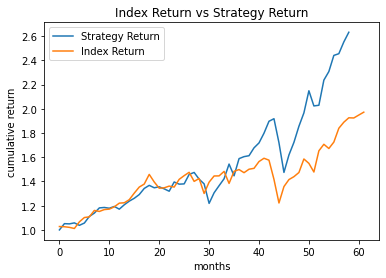

In [105]:
fig, ax = plt.subplots()
plt.plot((1+pflio(return_df,6,3)).cumprod())
plt.plot((1+DJI["mon_ret"][2:].reset_index(drop=True)).cumprod())
plt.title("Index Return vs Strategy Return")
plt.ylabel("cumulative return")
plt.xlabel("months")
ax.legend(["Strategy Return","Index Return"])

### 6.2 Momentum Strategy/ Dual Moving Crossover
Also called divergence or trend trading. When we follow this strategy, we believe the movement of a quantity will continue in its current direction; i.e if it is moving up then it will keep on moving up and same with down. Some examples are: <br>
- Moving average crossover: Crossover occurs when the price of an asset moves from one side of a moving average to the other, this crossover represents a change in momentum and can be used as a point of making the decision to enter or exit the market.
- Dual moving average crossover: Crossover occurs when a short-term average crosses a long-term average. When the short-term average crosses the long-term average, buy signal is triggered.
- Turtle trading: The basic strategy is to buy futures on a 20-day high and sell on a 20-day low.

#### Data Extraction & Manipulation
We will implement this strategy only for the Apple stock. It is important to select which stock to use for this strategy.

In [106]:
def Dual_Moving_Crossover(DF, short_window, long_window):
    signals=DF.copy()
    signals['short_mavg'] = signals['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
    signals['long_mavg'] = signals['Close'].rolling(window=long_window, min_periods=1, center=False).mean()
    signals.dropna(inplace=True)
    return signals

In [107]:
DMC_signals = pd.DataFrame()
DMC_signals=(Dual_Moving_Crossover(df_AAPL,40,100))
DMC_signals.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1254 entries, 2016-05-02 to 2021-04-23
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   High        1254 non-null   float64
 1   Low         1254 non-null   float64
 2   Open        1254 non-null   float64
 3   Close       1254 non-null   float64
 4   Volume      1254 non-null   float64
 5   Adj Close   1254 non-null   float64
 6   short_mavg  1254 non-null   float64
 7   long_mavg   1254 non-null   float64
dtypes: float64(8)
memory usage: 88.2 KB


In [108]:
DMC_signals

,High,Low,Open,Close,Volume,Adj Close,short_mavg,long_mavg
Date,,,,,,,,
2016-05-02,23.520000,23.100000,23.492500,23.410000,192640400.0,21.704407,23.410000,23.410000
2016-05-03,23.934999,23.420000,23.549999,23.795000,227325200.0,22.061357,23.602500,23.602500
2016-05-04,23.975000,23.455000,23.799999,23.547501,164102000.0,21.831896,23.584167,23.584167
2016-05-05,23.517500,23.170000,23.500000,23.309999,143562000.0,21.743273,23.515625,23.515625
2016-05-06,23.362499,22.962500,23.342501,23.180000,174799600.0,21.622013,23.448500,23.448500
...,...,...,...,...,...,...,...,...
2021-04-19,135.470001,133.339996,133.509995,134.839996,94264200.0,134.409973,124.751750,127.784900
2021-04-20,135.529999,131.809998,135.020004,133.110001,94812300.0,132.685501,124.929500,127.977500
2021-04-21,133.750000,131.300003,132.360001,133.500000,68847100.0,133.074234,125.120500,128.160800


<AxesSubplot:title={'center':'Dual Moving Crossover'}, xlabel='Date'>

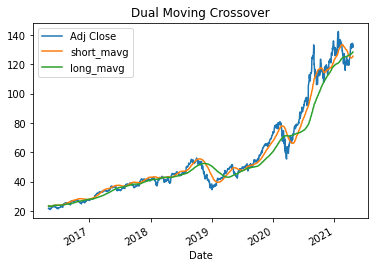

In [109]:
DMC_signals.iloc[:,[5,6,7]].plot(title="Dual Moving Crossover")

Not clear, coz a lot of date and hence we will look at the last 500 points.

<AxesSubplot:title={'center':'Dual Moving Crossover'}, xlabel='Date'>

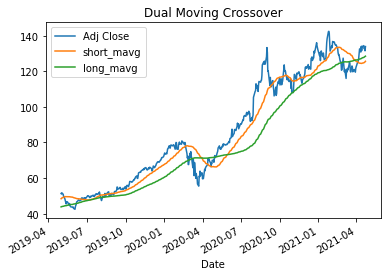

In [110]:
DMC_signals.iloc[-500:,[5,6,7]].plot(title="Dual Moving Crossover")

In [ ]:
# short_window=40
# long_window=100

In [113]:
short_window=20
long_window=50
DMC_signals = pd.DataFrame()
DMC_signals=(Dual_Moving_Crossover(df_AAPL,short_window,long_window))
DMC_signals['signal']= 0.0
DMC_signals['signal'][short_window:] = np.where(DMC_signals['short_mavg'][short_window:]>DMC_signals['long_mavg'][short_window:], 1.0, 0.0)   
DMC_signals['positions'] = DMC_signals['signal'].diff()
DMC_signals.dropna(inplace=True)
print(DMC_signals)

                  High         Low        Open       Close       Volume  \
Date                                                                      
2016-05-03   23.934999   23.420000   23.549999   23.795000  227325200.0   
2016-05-04   23.975000   23.455000   23.799999   23.547501  164102000.0   
2016-05-05   23.517500   23.170000   23.500000   23.309999  143562000.0   
2016-05-06   23.362499   22.962500   23.342501   23.180000  174799600.0   
2016-05-09   23.442499   23.147499   23.250000   23.197500  131745600.0   
...                ...         ...         ...         ...          ...   
2021-04-19  135.470001  133.339996  133.509995  134.839996   94264200.0   
2021-04-20  135.529999  131.809998  135.020004  133.110001   94812300.0   
2021-04-21  133.750000  131.300003  132.360001  133.500000   68847100.0   
2021-04-22  134.149994  131.410004  133.039993  131.940002   84566500.0   
2021-04-23  135.119995  132.160004  132.160004  134.320007   78657500.0   

             Adj Close  

<AxesSubplot:xlabel='Date'>

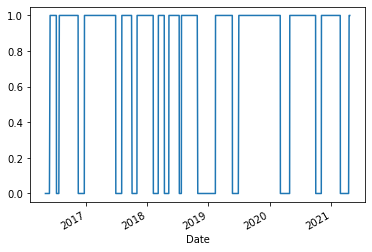

In [114]:
DMC_signals['signal'].plot()

In [115]:
DMC_signals.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1253 entries, 2016-05-03 to 2021-04-23
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   High        1253 non-null   float64
 1   Low         1253 non-null   float64
 2   Open        1253 non-null   float64
 3   Close       1253 non-null   float64
 4   Volume      1253 non-null   float64
 5   Adj Close   1253 non-null   float64
 6   short_mavg  1253 non-null   float64
 7   long_mavg   1253 non-null   float64
 8   signal      1253 non-null   float64
 9   positions   1253 non-null   float64
dtypes: float64(10)
memory usage: 107.7 KB


In [116]:
count1=0
count2=0
count3=0
for index, row in DMC_signals.iterrows():
    if(row['positions']==0.0):
        count1=count1+1
    elif(row['positions']==1.0):
        count2=count2+1
    else:
        count3=count3+1
print(count1,count2,count3)

1228 13 12


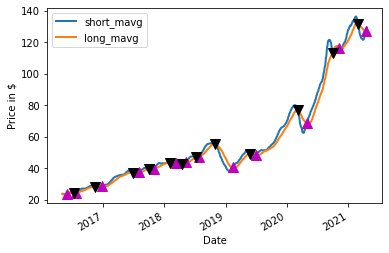

In [117]:
fig = plt.figure()

ax1 = fig.add_subplot(111,  ylabel='Price in $')
DMC_signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(DMC_signals.loc[DMC_signals.positions == 1.0].index, 
         DMC_signals.short_mavg[DMC_signals.positions == 1.0],
         '^', markersize=10, color='m')    
# Plot the sell signals
ax1.plot(DMC_signals.loc[DMC_signals.positions == -1.0].index, 
         DMC_signals.short_mavg[DMC_signals.positions == -1.0],
         'v', markersize=10, color='k')
plt.show()

#### Implementation

In [118]:
initial_capital= float(100000.0)
positions = pd.DataFrame(index=DMC_signals.index).fillna(0.0)
# Buy a 120 shares
positions['AAPL'] = 100*DMC_signals['signal']
portfolio = positions.multiply(df_AAPL['Adj Close'], axis=0)
pos_diff = positions.diff()
portfolio['holdings'] = (positions.multiply(df_AAPL['Adj Close'], axis=0)).sum(axis=1)
portfolio['cash'] = initial_capital - (pos_diff.multiply(df_AAPL['Adj Close'], axis=0)).sum(axis=1).cumsum()   
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()
portfolio.dropna(inplace=True)
print(portfolio.head())

            AAPL  holdings      cash     total  returns
Date                                                   
2016-05-03   0.0       0.0  100000.0  100000.0      0.0
2016-05-04   0.0       0.0  100000.0  100000.0      0.0
2016-05-05   0.0       0.0  100000.0  100000.0      0.0
2016-05-06   0.0       0.0  100000.0  100000.0      0.0
2016-05-09   0.0       0.0  100000.0  100000.0      0.0


#### Evaluation

In [120]:
def CAGR_DCM(df):
    df2=df.copy()
    days = (df2.index[-1] - df2.index[0]).days
    cagr = ((((df2['total'][-1]) / df2['total'][1])) ** (365.0/days)) - 1
    return cagr

def volatility_DCM(df):
    df2=df.copy()
    df2['daily returns']=df2['total'].pct_change()
    vol=df2['daily returns'].std() * np.sqrt(252)
    return vol

def sharpe_DCM(df,rf):
    sharpe_ratio = (CAGR_DCM(df)-rf) / volatility_DCM(df)
    return sharpe_ratio
# def max_drawdown_DCM(df):
#     df2=df.copy()
#     df2['daily returns']=df2['Adj Close'].pct_change()
#     df2['cum returns']=(1+df2['daily returns']).cumprod()
#     df2['cum roll max']= df2['cum returns'].cummax()
#     df2['drawdown']=df2['cum roll max']-df2['cum returns']
#     df2['drawdown_pct']=df2['drawdown']/df2['cum roll max']
#     max_dd=df2['drawdown'].max()
#     return max_dd
round(CAGR_DCM(portfolio),2), round(volatility_DCM(portfolio),2) , round(sharpe_DCM(portfolio,0.025),2)

(0.02, 0.02, -0.59)

#### Visualization 

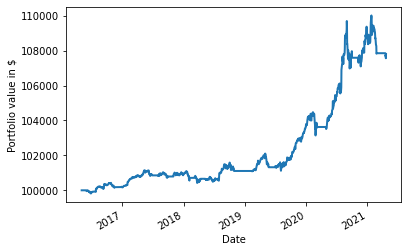

In [121]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')
portfolio['total'].plot(ax=ax1, lw=2.)
plt.show()

### 6.3 Intraday Resistance Breakout Strategy
In this strategy, we define a resistance level and trade when the stock breaks out of that resistance level. We choose high volume & high activity stocks for this strategy. We have to define 2 things for this strategy, <br>
- Breakout rule: When price breaches the 20 period rolling min/max. <br>
- Exit/Stop-Loss Signal: Price +/- 20 period ATR.

#### Data Extraction & Manipulation

In [234]:
tickers=['AAPL','MSFT']

In [260]:
ohlc = {}          
attempt = 0 
drop = [] 
while len(tickers) != 0 and attempt <= 5:
    tickers = [j for j in tickers if j not in drop] 
    for i in range(len(tickers)):
        try:
            ohlc[tickers[i]] = pdr.get_data_yahoo(tickers[i],datetime.date.today()-datetime.timedelta(2000),datetime.date.today()-datetime.timedelta(180),interval='d')
            ohlc[tickers[i]].dropna(inplace = True)
            drop.append(tickers[i])       
        except:
            print(tickers[i],"failed to fetch data, retrying")
            continue
    attempt+=1
tickers = ohlc.keys()

In [261]:
tickers

dict_keys(['AAPL', 'MSFT'])

In [262]:
ohlc['AAPL']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-05-03,23.934999,23.420000,23.549999,23.795000,227325200.0,22.061359
2016-05-04,23.975000,23.455000,23.799999,23.547501,164102000.0,21.831892
2016-05-05,23.517500,23.170000,23.500000,23.309999,143562000.0,21.743273
2016-05-06,23.362499,22.962500,23.342501,23.180000,174799600.0,21.622011
2016-05-09,23.442499,23.147499,23.250000,23.197500,131745600.0,21.638334
...,...,...,...,...,...,...
2021-04-21,133.750000,131.300003,132.360001,133.500000,68847100.0,133.074234
2021-04-22,134.149994,131.410004,133.039993,131.940002,84566500.0,131.519226
2021-04-23,135.119995,132.160004,132.160004,134.320007,78657500.0,133.891632


In [263]:
import copy
ohlc_dict = copy.deepcopy(ohlc)
tickers_signal = {}
tickers_ret = {}
for ticker in tickers:
    ohlc_dict[ticker] = ATR(ohlc_dict[ticker],20)
    ohlc_dict[ticker]["act_return"] = ohlc_dict[ticker]["Adj Close"].pct_change(fill_method ='ffill')
    ohlc_dict[ticker]["roll_max_cp"] = ohlc_dict[ticker]["High"].rolling(20).max()
    ohlc_dict[ticker]["roll_min_cp"] = ohlc_dict[ticker]["Low"].rolling(20).min()
    ohlc_dict[ticker]["roll_max_vol"] = ohlc_dict[ticker]["Volume"].rolling(20).max()
    ohlc_dict[ticker].dropna(inplace=True)
    tickers_signal[ticker] = ""
    tickers_ret[ticker] = []
ohlc_dict['MSFT'] 

,High,Low,Open,Close,Volume,Adj Close,TR,ATR,act_return,roll_max_cp,roll_min_cp,roll_max_vol
Date,,,,,,,,,,,,
2016-06-28,49.470001,48.669998,48.919998,49.439999,38140700.0,45.459976,4.938725,4.352522,0.020855,52.950001,48.040001,133503000.0
2016-06-29,50.720001,49.799999,49.910000,50.540001,31304000.0,46.471413,5.260025,4.404693,0.022249,52.740002,48.040001,133503000.0
2016-06-30,51.299999,50.500000,50.720001,51.169998,28527800.0,47.050701,4.828587,4.438895,0.012465,52.730000,48.040001,133503000.0
2016-07-01,51.720001,51.070000,51.130001,51.160000,21400400.0,47.041504,4.669300,4.464122,-0.000195,52.730000,48.040001,133503000.0
2016-07-05,51.279999,50.740002,50.830002,51.169998,24806400.0,47.050701,4.238495,4.439587,0.000196,52.730000,48.040001,133503000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,260.679993,257.250000,258.940002,260.579987,24030400.0,259.482910,3.507294,4.626973,0.008983,261.480011,231.100006,43623500.0
2021-04-22,261.779999,255.639999,260.209991,257.170013,25606200.0,256.087280,6.139999,4.799973,-0.013086,261.779999,231.100006,43623500.0
2021-04-23,261.510010,257.269989,257.880005,261.149994,21462600.0,260.050537,5.422729,4.802610,0.015476,261.779999,231.100006,43623500.0


#### Implementation

In [264]:
# def orderscale()

In [265]:
temp={}
for ticker in tickers:
    a=[]
    for i in range(len(ohlc_dict[ticker])):
        if tickers_signal[ticker] == "":
            tickers_ret[ticker].append(0)
            #if ohlc_dict[ticker]["High"][i]>=ohlc_dict[ticker]["roll_max_cp"][i]:
            if ohlc_dict[ticker]["High"][i]>=ohlc_dict[ticker]["roll_max_cp"][i] and \
               ohlc_dict[ticker]["Volume"][i]>1.5*ohlc_dict[ticker]["roll_max_vol"][i-1]:
                tickers_signal[ticker] = "Buy"
                a.append(1)
            #elif ohlc_dict[ticker]["Low"][i]<=ohlc_dict[ticker]["roll_min_cp"][i]:
            elif ohlc_dict[ticker]["Low"][i]<=ohlc_dict[ticker]["roll_min_cp"][i] and \
               ohlc_dict[ticker]["Volume"][i]>1.5*ohlc_dict[ticker]["roll_max_vol"][i-1]:
                tickers_signal[ticker] = "Sell"
                a.append(-1)
            else:
                a.append(0)
        
        elif tickers_signal[ticker] == "Buy":
            if ohlc_dict[ticker]["Adj Close"][i]<ohlc_dict[ticker]["Adj Close"][i-1] - ohlc_dict[ticker]["ATR"][i-1]:
                tickers_signal[ticker] = ""
                tickers_ret[ticker].append(((ohlc_dict[ticker]["Adj Close"][i-1] - ohlc_dict[ticker]["ATR"][i-1])/ohlc_dict[ticker]["Adj Close"][i-1])-1)
                a.append(0)
            #elif ohlc_dict[ticker]["Low"][i]<=ohlc_dict[ticker]["roll_min_cp"][i]:
            elif ohlc_dict[ticker]["Low"][i]<=ohlc_dict[ticker]["roll_min_cp"][i] and \
               ohlc_dict[ticker]["Volume"][i]>1.5*ohlc_dict[ticker]["roll_max_vol"][i-1]:
                tickers_signal[ticker] = "Sell"
                tickers_ret[ticker].append(((ohlc_dict[ticker]["Adj Close"][i-1] - ohlc_dict[ticker]["ATR"][i-1])/ohlc_dict[ticker]["Adj Close"][i-1])-1)
                a.append(-1)
            else:
                tickers_ret[ticker].append((ohlc_dict[ticker]["Adj Close"][i]/ohlc_dict[ticker]["Adj Close"][i-1])-1)
                a.append(1)
        elif tickers_signal[ticker] == "Sell":
            if ohlc_dict[ticker]["Adj Close"][i]>ohlc_dict[ticker]["Adj Close"][i-1] + ohlc_dict[ticker]["ATR"][i-1]:
                tickers_signal[ticker] = ""
                tickers_ret[ticker].append((ohlc_dict[ticker]["Adj Close"][i-1]/(ohlc_dict[ticker]["Adj Close"][i-1] + ohlc_dict[ticker]["ATR"][i-1]))-1)
                a.append(0)
            #elif ohlc_dict[ticker]["High"][i]>=ohlc_dict[ticker]["roll_max_cp"][i]:
            elif ohlc_dict[ticker]["High"][i]>=ohlc_dict[ticker]["roll_max_cp"][i] and \
               ohlc_dict[ticker]["Volume"][i]>1.5*ohlc_dict[ticker]["roll_max_vol"][i-1]:
                tickers_signal[ticker] = "Buy"
                tickers_ret[ticker].append((ohlc_dict[ticker]["Adj Close"][i-1]/(ohlc_dict[ticker]["Adj Close"][i-1] + ohlc_dict[ticker]["ATR"][i-1]))-1)
                a.append(1)
            else:
                tickers_ret[ticker].append((ohlc_dict[ticker]["Adj Close"][i-1]/ohlc_dict[ticker]["Adj Close"][i])-1)
                a.append(-1)
    #temp[ticker]=a
    ohlc_dict[ticker]["signal"]=np.array(a)
    ohlc_dict[ticker]["ret"] = np.array(tickers_ret[ticker])


#### Evaluation

In [266]:
ohlc_dict[ticker]["ret"]

Date
2016-06-28    0.0
2016-06-29    0.0
2016-06-30    0.0
2016-07-01    0.0
2016-07-05    0.0
             ... 
2021-04-21    0.0
2021-04-22    0.0
2021-04-23    0.0
2021-04-26    0.0
2021-04-27    0.0
Name: ret, Length: 1216, dtype: float64

In [267]:
c=0
for i in range(len(ohlc_dict['AAPL'])):
    if ohlc_dict['AAPL']['signal'][i]!=ohlc_dict['AAPL']['signal'][i-1]:
        c+=1
c

23

In [268]:
sum(ohlc_dict['AAPL']['signal'])

237

In [269]:
a.plot()

AttributeError: 'list' object has no attribute 'plot'

<AxesSubplot:xlabel='Date'>

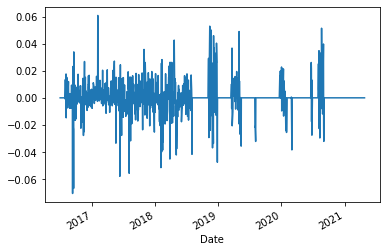

In [270]:
ohlc_dict['AAPL']['ret'].plot()

<AxesSubplot:xlabel='Date'>

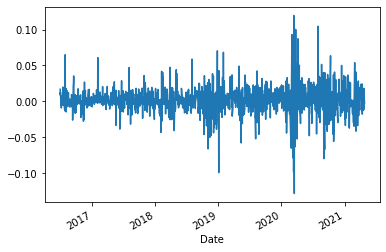

In [271]:
ohlc_dict['AAPL']['act_return'].plot()

In [272]:
strat_pos,strat_zer,strat_neg=0,0,0
act_pos,act_zer,act_neg=0,0,0
ppt=0
lpt=0
tp=0
fp=0
tn=0
fn=0
for i in range(len(ohlc_dict['AAPL'])):
    if ohlc_dict['AAPL']['act_return'][i]>0.001:
        act_pos+=1
        #ppt+=ohlc_dict['AAPL']['act_return'][i]
    elif ohlc_dict['AAPL']['act_return'][i]< -0.001:
        act_neg+=1
    else:
        #lpt+=abs(ohlc_dict['AAPL']['act_return'][i])
        act_zer+=1
    
    if ohlc_dict['AAPL']['ret'][i]>0:
        strat_pos+=1
        ppt+=ohlc_dict['AAPL']['ret'][i]
    elif ohlc_dict['AAPL']['ret'][i]==0:
        strat_zer+=1
    else:
        lpt+=abs(ohlc_dict['AAPL']['ret'][i])
        strat_neg+=1

In [273]:
# print("preceision")
# strat_pos/(strat_pos+)

In [274]:
print("ppt,lpt,pos,zero,neg")
ppt,lpt,x,y,z

ppt,lpt,pos,zero,neg


(3.5567105564999277, 3.099575629942858, 327, 604, 284)

In [248]:
def CAGR_RB(DF):
    df = DF.copy()
    df["cum_return"] = (1 + df["ret"]).cumprod()
    n = len(df)/(252*78)
    CAGR = (df["cum_return"].tolist()[-1])**(1/n) - 1
    return CAGR

def volatility_RB(DF):
    df = DF.copy()
    vol = df["ret"].std() * np.sqrt(252*78)
    return vol

def sharpe_RB(DF,rf):
    df = DF.copy()
    sharpe = (CAGR_RB(df) - rf)/volatility_RB(df)
    return sharpe
    

def max_dd_RB(DF):
    df = DF.copy()
    df["cum_return"] = (1 + df["ret"]).cumprod()
    df["cum_roll_max"] = df["cum_return"].cummax()
    df["drawdown"] = df["cum_roll_max"] - df["cum_return"]
    df["drawdown_pct"] = df["drawdown"]/df["cum_roll_max"]
    max_dd = df["drawdown_pct"].max()
    return max_dd


strategy_df = pd.DataFrame()
for ticker in tickers:
    strategy_df[ticker] = ohlc_dict[ticker]["ret"]
strategy_df["ret"] = strategy_df.mean(axis=1)
round(CAGR_RB(strategy_df),2), round(sharpe_RB(strategy_df,0.025),2), round(max_dd_RB(strategy_df),2) , round(max_dd_RB(strategy_df),2)

(597363.47, 617265.45, 0.09, 0.09)

#### Visualization

In [251]:
sharpe_RB(strategy_df,0.025)

617265.4497564717

<AxesSubplot:xlabel='Date'>

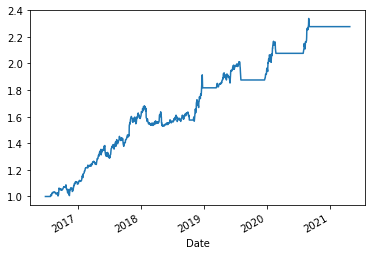

In [249]:
(1+strategy_df["ret"]).cumprod().plot()

### 6.4 Intraday Renko & OBV
In this strategy, we use renko chart and OBV to generate Buy/Sell signals. We choose high volume & high activity stocks for this strategy. <br>
Buy Signal
- Renko Bar >= 2 <br>
- 5 Day OBV Slope > 30&deg;
- Exit if Renko Bar < 2<br>

Sell Signal
- Renko Bar <= -2 <br>
- 5 Day OBV Slope < -30&deg;
- Exit if Renko Bar > -2


#### Data Extraction & Manipulation
Already done in the Resistance Breakout Strategy

In [176]:
ohlc['MSFT'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-13,47.910000,46.060001,46.970001,46.360001,35270600.0,41.391430
2015-01-14,46.240002,45.619999,45.959999,45.959999,29719600.0,41.034302
2015-01-15,46.380001,45.410000,46.220001,45.480000,32750800.0,40.605755
2015-01-16,46.279999,45.169998,45.310001,46.240002,35695300.0,41.284302
2015-01-20,46.650002,45.570000,46.299999,46.389999,36161900.0,41.418217


#### Implementation

In [175]:
def renko_DF(DF):
    "function to convert ohlc data into renko bricks"
    df = DF.copy()
    df.reset_index(inplace=True)
    df = df.iloc[:,[0,1,2,3,4,5]]
    df.columns = ["date","open","high","low","close","volume"]
    df2 = Renko(df)
    df2.brick_size = round(ATR(DF,120)["ATR"][-1],0)
    renko_df = df2.get_ohlc_data()
    renko_df["bar_num"] = np.where(renko_df["uptrend"]==True,1,np.where(renko_df["uptrend"]==False,-1,0))
    for i in range(1,len(renko_df["bar_num"])):
        if renko_df["bar_num"][i]>0 and renko_df["bar_num"][i-1]>0:
            renko_df["bar_num"][i]+=renko_df["bar_num"][i-1]
        elif renko_df["bar_num"][i]<0 and renko_df["bar_num"][i-1]<0:
            renko_df["bar_num"][i]+=renko_df["bar_num"][i-1]
    renko_df.drop_duplicates(subset="date",keep="last",inplace=True)
    return renko_df


# def renko_DF(DF):
#     df = DF.copy()
#     df.reset_index(inplace=True)
#     df = df.iloc[:,[0,1,2,3,5,6]]
#     df.rename(columns = {"Date" : "date", "High" : "high","Low" : "low", "Open" : "open","Adj Close" : "close", "Volume" : "volume"}, inplace = True)
#     df2 = Renko(df)
#     df2.brick_size = round(ATR(DF,120)["ATR"][-1],0)
#     renko_df = df2.get_ohlc_data()
#     print(renko_df)
#     return renko_df

tickers = ["MSFT","AAPL","FB","AMZN","INTC", "CSCO","VZ","IBM","QCOM","LYFT"]

In [ ]:
ohlc_intraday = {}          
ts = TimeSeries(key = 'GKR7N17NQ0AOYH7T', output_format='pandas')
attempt = 0 # initializing passthrough variable
drop = [] # initializing list to store tickers whose close price was successfully extracted
while len(tickers) != 0 and attempt <=300:
    tickers = [j for j in tickers if j not in drop]
    for i in range(len(tickers)):
        try:
            ohlc_intraday[tickers[i]] = ts.get_intraday(symbol=tickers[i],interval='5min', outputsize='full')[0]
            ohlc_intraday[tickers[i]].columns = ["Open","High","Low","Adj Close","Volume"]
            drop.append(tickers[i])      
        except:
            print(tickers[i]," :failed to fetch data...retrying")
            continue
    attempt+=1
tickers = ohlc_intraday.keys() 

In [ ]:
#Merging renko df with original ohlc df
ohlc_renko = {}
df = copy.deepcopy(ohlc_intraday)
tickers_signal = {}
tickers_ret = {}
for ticker in tickers:
    print("merging for ",ticker)
    renko = renko_DF(df[ticker])
    renko.columns = ["Date","open","high","low","close","uptrend","bar_num"]
    df[ticker]["Date"] = df[ticker].index
    ohlc_renko[ticker] = df[ticker].merge(renko.loc[:,["Date","bar_num"]],how="outer",on="Date")
    ohlc_renko[ticker]["bar_num"].fillna(method='ffill',inplace=True)
    ohlc_renko[ticker]["obv"]= OBV(ohlc_renko[ticker])
    ohlc_renko[ticker]["obv_slope"]= slope(ohlc_renko[ticker]["obv"],5)
    tickers_signal[ticker] = ""
    tickers_ret[ticker] = []

In [ ]:
#Identifying signals and calculating daily return
for ticker in tickers:
    print("calculating daily returns for ",ticker)
    for i in range(len(ohlc[ticker])):
        if tickers_signal[ticker] == "":
            tickers_ret[ticker].append(0)
            if ohlc_renko[ticker]["bar_num"][i]>=2 and ohlc_renko[ticker]["obv_slope"][i]>30:
                tickers_signal[ticker] = "Buy"
            elif ohlc_renko[ticker]["bar_num"][i]<=-2 and ohlc_renko[ticker]["obv_slope"][i]<-30:
                tickers_signal[ticker] = "Sell"
        
        elif tickers_signal[ticker] == "Buy":
            tickers_ret[ticker].append((ohlc_renko[ticker]["Adj Close"][i]/ohlc_renko[ticker]["Adj Close"][i-1])-1)
            if ohlc_renko[ticker]["bar_num"][i]<=-2 and ohlc_renko[ticker]["obv_slope"][i]<-30:
                tickers_signal[ticker] = "Sell"
            elif ohlc_renko[ticker]["bar_num"][i]<2:
                tickers_signal[ticker] = ""
                
        elif tickers_signal[ticker] == "Sell":
            tickers_ret[ticker].append((ohlc_renko[ticker]["Adj Close"][i-1]/ohlc_renko[ticker]["Adj Close"][i])-1)
            if ohlc_renko[ticker]["bar_num"][i]>=2 and ohlc_renko[ticker]["obv_slope"][i]>30:
                tickers_signal[ticker] = "Buy"
            elif ohlc_renko[ticker]["bar_num"][i]>-2:
                tickers_signal[ticker] = ""
    ohlc_renko[ticker]["ret"] = np.array(tickers_ret[ticker])

#### Evaluation

In [177]:
def CAGR_monthly(DF):
    df = DF.copy()
    df["cum_return"] = (1 + df["mon_ret"]).cumprod()
    n = len(df)/12
    CAGR = (df["cum_return"].tolist()[-1])**(1/n) - 1
    return CAGR

def volatility_monthly(DF):
    df = DF.copy()
    vol = df["mon_ret"].std() * np.sqrt(12)
    return vol

def sharpe_monthly(DF,rf):
    df = DF.copy()
    sharpe = (CAGR_monthly(df) - rf)/volatility_monthly(df)
    return sharpe

def max_dd_monthly(DF):
    df = DF.copy()
    df["cum_return"] = (1 + df["mon_ret"]).cumprod()
    df["cum_roll_max"] = df["cum_return"].cummax()
    df["drawdown"] = df["cum_roll_max"] - df["cum_return"]
    df["drawdown_pct"] = df["drawdown"]/df["cum_roll_max"]
    max_dd = df["drawdown_pct"].max()
    return max_dd


round(CAGR_monthly(pflio(return_df,6,3)),2), round(sharpe_monthly(pflio(return_df,6,3),0.025),2), round(max_dd_monthly(pflio(return_df,6,3)),2)


KeyError: "['QCOM', 'FB', 'LYFT', 'AMZN'] not in index"

### Reversion Strategy
Also known as convergence or cycle trading. This strategy departs from the belief that the movement of a quantity will eventually reverse. 
- Mean-Reversion: We believe that the stocks will return to their mean and that you can exploit when it deviates from that mean.
- Pairs Trading Mean-Reversion: States that if two stocks have a relatively high correlation, the change in the difference in price between the two stocks can be used to signal trading events if one of the two moves out of correlation with the other.

### Bollinger Bands and ATR 
Also known as convergence or cycle trading. This strategy departs from the belief that the movement of a quantity will eventually reverse. 
- Mean-Reversion: We believe that the stocks will return to their mean and that you can exploit when it deviates from that mean.
- Pairs Trading Mean-Reversion: States that if two stocks have a relatively high correlation, the change in the difference in price between the two stocks can be used to signal trading events if one of the two moves out of correlation with the other.